#### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import itertools
import matplotlib.patheffects as pe
import matplotlib.path as mpath
import cartopy.mpl.gridliner as gridliner
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.patches import Rectangle
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker
import geopandas as gpd
from matplotlib import image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

import warnings
warnings.simplefilter('ignore')

#### Shapefile for Inuit Region

In [2]:
path='/storage2/tkyeimiah/Region_inuite_Inuit_Region_SHP/'
gd = gpd.read_file(path+"Inuit_Region_Region_inuite.shp")
gd.head()

,REGION,geometry
0,Inuvialuit,"MULTIPOLYGON (((-120.68161 67.99999, -120.9511..."
1,Nunavik,"MULTIPOLYGON (((-63.33243 55.38142, -63.36183 ..."
2,Nunavut,"MULTIPOLYGON (((-81.18545 67.46368, -81.18562 ..."
3,Nunatsiavut,"MULTIPOLYGON (((-64.93758 59.57095, -64.92865 ..."


###### Selecting Nunatsiavut Region

<AxesSubplot:>

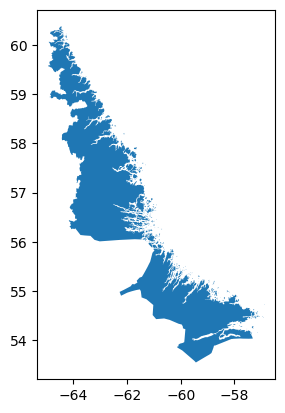

In [3]:
nun=gd[gd['REGION']=='Nunatsiavut']
nun.plot()

#### Shapefile for Canadian Eastern Provinces

In [4]:
path='/storage2/tkyeimiah/lpr_000b16a_e/'
gdf = gpd.read_file(path+"lpr_000b16a_e.shp")
gdf.head()

,PRUID,PRNAME,PRENAME,PRFNAME,PREABBR,PRFABBR,geometry
0,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,Newfoundland and Labrador,Terre-Neuve-et-Labrador,N.L.,T.-N.-L.,"MULTIPOLYGON (((8307365.589 2582136.711, 83083..."
1,11,Prince Edward Island / Île-du-Prince-Édouard,Prince Edward Island,Île-du-Prince-Édouard,P.E.I.,Î.-P.-É.,"MULTIPOLYGON (((8435711.754 1679935.966, 84358..."
2,12,Nova Scotia / Nouvelle-Écosse,Nova Scotia,Nouvelle-Écosse,N.S.,N.-É.,"MULTIPOLYGON (((8470851.646 1624745.011, 84710..."
3,13,New Brunswick / Nouveau-Brunswick,New Brunswick,Nouveau-Brunswick,N.B.,N.-B.,"MULTIPOLYGON (((8176224.537 1722553.460, 81762..."
4,24,Quebec / Québec,Quebec,Québec,Que.,Qc,"MULTIPOLYGON (((8399709.494 2261445.703, 84005..."


###### Selecting NL Province

<AxesSubplot:>

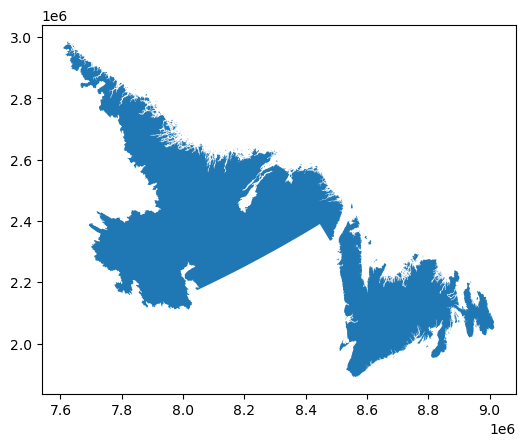

In [5]:
NL_gdf = gdf[gdf['PREABBR'] == 'N.L.']
NL_gdf.plot()

#### Plot 

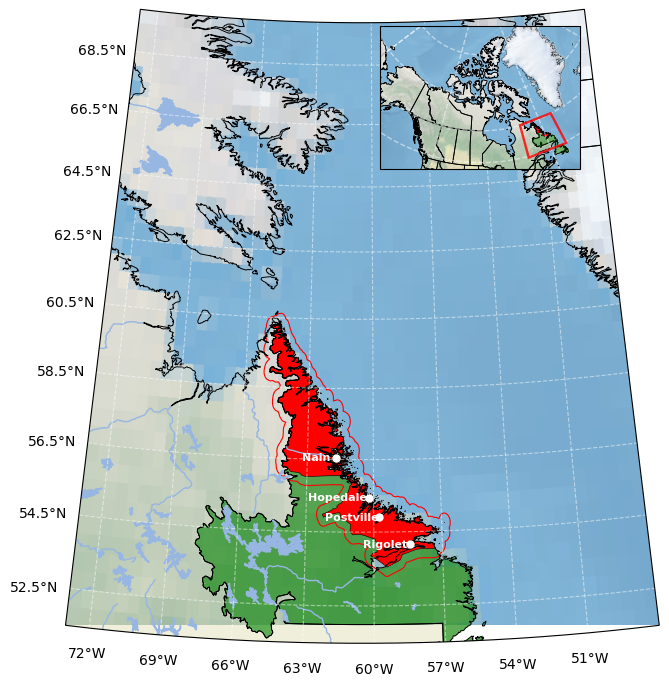

In [7]:
NL_gdf_crs = NL_gdf.to_crs(epsg=4326)
nun_crs= nun.to_crs(epsg=4326)
# Define the Cartopy CRS
x0,x1,y0,y1=-73,-48,51.5,70
#x0,x1,y0,y1=-76,-53,51,68
#x0,x1,y0,y1=-70,-50,51.5,63
c_lon = (x0 + x1) / 2
c_lat = (y0 + y1) / 2
proj= ccrs.AlbersEqualArea(central_longitude=c_lon, central_latitude=c_lat)

# Create a new matplotlib figure and axes
fig, ax = plt.subplots(figsize=(10,8), subplot_kw={'projection': proj})

# Convert the geometry column to a list of geometries
geometries = NL_gdf_crs.geometry.values
geometriess= nun_crs.geometry.values
# Add each geometry to the axes
for geometry in geometries:
    ax.add_geometries([geometry], crs=ccrs.PlateCarree(), facecolor='green', edgecolor='none',alpha=0.6)
for geometry in geometriess:
    ax.add_geometries([geometry], crs=ccrs.PlateCarree(), facecolor='red', edgecolor='black',linewidth=0.4)
    buffer_distance = 0.25
for geometry in geometriess:
    buffered_geometry = geometry.buffer(buffer_distance)
    ax.add_geometries([buffered_geometry], crs=ccrs.PlateCarree(), edgecolor='red', facecolor='none', linewidth=0.8)


#ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=0.7)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.LAKES.with_scale('10m'))
#ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.RIVERS.with_scale('10m'))
#ax.add_feature(cfeature.OCEAN, alpha=0.85)
ax.set_extent([x0,x1,y0,y1],crs=ccrs.PlateCarree())
vertices = [(lon, y0) for lon in range(x0, x1+1, 1)] + [(lon, y1) for lon in range(x1, x0-1, -1)]
boundary = mpath.Path(vertices)
ax.set_boundary(boundary, transform=ccrs.PlateCarree())
#gl=ax.gridlines(draw_labels=True, color='white', alpha=0.5,linestyle='--',transform=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=False, color='white', alpha=0.5, linestyle='--', transform=ccrs.PlateCarree())
#gl.xlabels_bottom, gl.ylabels_left = True, True 
#gl.xlabels_top, gl.ylabels_right = False, False
#gl.xformatter = gridliner.LongitudeFormatter()
#gl.yformatter = gridliner.LatitudeFormatter()

xticks = np.arange(x0+1, x1, 3)  # Replace with desired x tick locations
yticks = np.arange(y0+1, y1, 2)  # Replace with desired y tick locations

gl.xlocator = mticker.FixedLocator(xticks)
gl.ylocator = mticker.FixedLocator(yticks)

# Format the labels
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

for lon in xticks:
    ax.text(lon, y0-0.5, LONGITUDE_FORMATTER(lon), va='top', ha='center', transform=ccrs.PlateCarree())
for lat in yticks:
    ax.text(x0-0.5, lat, LATITUDE_FORMATTER(lat), va='center', ha='right', transform=ccrs.PlateCarree())


# Add town names
town_names = ['Nain', 'Hopedale', 'Rigolet', 'Postville']  # Replace with town names in Newfoundland and Labrador
town_lon = [-61.69-0.9, -60.21-1.4, -58.42-1.1, -59.77-1.2]  # Replace with corresponding town longitudes
town_lat = [56.54, 55.45, 54.17, 54.91]  # Replace with corresponding town latitudes
for name, lon, lat in zip(town_names, town_lon, town_lat):
    ax.text(lon, lat, name, transform=ccrs.PlateCarree(), fontsize=8, fontweight='bold',color='white',
            ha='center', va='center')


# Add points
point_lon = [-61.69, -60.21, -58.42, -59.77]  # Replace with point longitudes
point_lat = [56.54, 55.45, 54.17, 54.91]  # Replace with point latitudes
ax.scatter(point_lon, point_lat, transform=ccrs.PlateCarree(), c='white', marker='o', s=25, zorder=11)
ax.stock_img()



#------------------------------------------------
# Create the inset plot
x2,x3,y2,y3=-141, -52, 40, 84
ax1= fig.add_axes([0.53, 0.67, 0.2, 0.2], projection=ccrs.LambertConformal())
ax1.set_extent([x2,x3,y2,y3])
ax1.coastlines(linewidth=0.2)
ax1.add_feature(cfeature.STATES.with_scale('50m'),linewidth=0.6)
ax1.add_feature(cfeature.LAND)
ax1.add_feature(cfeature.OCEAN)
for geometry in geometries:
    ax1.add_geometries([geometry], crs=ccrs.PlateCarree(), facecolor='green', edgecolor='none',alpha=0.4)
for geometry in geometriess:
    ax1.add_geometries([geometry], crs=ccrs.PlateCarree(), facecolor='red', edgecolor='black',linewidth=0.4)

#rectangle
ax1.gridlines(draw_labels=False, linewidth=1, alpha=0.5, linestyle='--', color='white')
ax1.add_patch(mpatches.Rectangle(xy=[-72, 49.6], width=20, height=10.5, linewidth=1.7, facecolor='none',
                                 edgecolor='red',alpha=0.8,zorder=10, transform=ccrs.PlateCarree()))
ax1.stock_img()


plt.savefig('/storage2/tkyeimiah/Plots/Fig1.jpg', dpi=300, bbox_inches='tight')


plt.show()
